In [7]:
# Author:Zhang Yuan
from MyPackage import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# ------------------------------------------------------------
__mypath__ = MyPath.MyClass_Path("")  # 路径类
mylogging = MyDefault.MyClass_Default_Logging(activate=False)  # 日志记录类，需要放在上面才行
myfile = MyFile.MyClass_File()  # 文件操作类
myword = MyFile.MyClass_Word()  # word生成类
myexcel = MyFile.MyClass_Excel()  # excel生成类
myini = MyFile.MyClass_INI()  # ini文件操作类
mytime = MyTime.MyClass_Time()  # 时间类
myparallel = MyTools.MyClass_ParallelCal()  # 并行运算类
myplt = MyPlot.MyClass_Plot()  # 直接绘图类(单个图窗)
mypltpro = MyPlot.MyClass_PlotPro()  # Plot高级图系列
myfig = MyPlot.MyClass_Figure(AddFigure=False)  # 对象式绘图类(可多个图窗)
myfigpro = MyPlot.MyClass_FigurePro(AddFigure=False)  # Figure高级图系列
mynp = MyArray.MyClass_NumPy()  # 多维数组类(整合Numpy)
mypd = MyArray.MyClass_Pandas()  # 矩阵数组类(整合Pandas)
mypdpro = MyArray.MyClass_PandasPro()  # 高级矩阵数组类
myDA = MyDataAnalysis.MyClass_DataAnalysis()  # 数据分析类
myDefault = MyDefault.MyClass_Default_Matplotlib()  # 画图恢复默认设置类
# myMql = MyMql.MyClass_MqlBackups() # Mql备份类
# myBaidu = MyWebCrawler.MyClass_BaiduPan() # Baidu网盘交互类
# myImage = MyImage.MyClass_ImageProcess()  # 图片处理类
myBT = MyBackTest.MyClass_BackTestEvent()  # 事件驱动型回测类
myBTV = MyBackTest.MyClass_BackTestVector()  # 向量型回测类
myML = MyMachineLearning.MyClass_MachineLearning()  # 机器学习综合类
mySQL = MyDataBase.MyClass_MySQL(connect=False)  # MySQL类
mySQLAPP = MyDataBase.MyClass_SQL_APPIntegration()  # 数据库应用整合
myWebQD = MyWebCrawler.MyClass_QuotesDownload(tushare=False)  # 金融行情下载类
myWebR = MyWebCrawler.MyClass_Requests()  # Requests爬虫类
myWebS = MyWebCrawler.MyClass_Selenium(openChrome=False)  # Selenium模拟浏览器类
myWebAPP = MyWebCrawler.MyClass_Web_APPIntegration()  # 爬虫整合应用类
myEmail = MyWebCrawler.MyClass_Email()  # 邮箱交互类
myReportA = MyQuant.MyClass_ReportAnalysis()  # 研报分析类
myFactorD = MyQuant.MyClass_Factor_Detection()  # 因子检测类
myKeras = MyDeepLearning.MyClass_tfKeras()  # tfKeras综合类
myTensor = MyDeepLearning.MyClass_TensorFlow()  # Tensorflow综合类
myMT5 = MyMql.MyClass_ConnectMT5(connect=False)  # Python链接MetaTrader5客户端类
myMT5Pro = MyMql.MyClass_ConnectMT5Pro(connect=False)  # Python链接MT5高级类
myMT5Indi = MyMql.MyClass_MT5Indicator()  # MT5指标Python版
myMT5Report = MyMT5Report.MyClass_StratTestReport(AddFigure=False)  # MT5策略报告类
myMT5Lots_Fix = MyMql.MyClass_Lots_FixedLever(connect=False)  # 固定杠杆仓位类
myMT5Lots_Dy = MyMql.MyClass_Lots_DyLever(connect=False)  # 浮动杠杆仓位类
myMT5run = MyMql.MyClass_RunningMT5()  # Python运行MT5
myMT5code = MyMql.MyClass_CodeMql5()  # Python生成MT5代码
myMoneyM = MyTrade.MyClass_MoneyManage()  # 资金管理类
# myDefault.set_backend_default("Pycharm")  # Pycharm下需要plt.show()才显示图
# ------------------------------------------------------------
# Jupyter Notebook 控制台显示必须加上：%matplotlib inline ，弹出窗显示必须加上：%matplotlib auto
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [8]:
### 数据切片的分布研究
symbol_list = ['EURUSD', 'GBPUSD', 'AUDUSD', 'NZDUSD', 'USDJPY', 'USDCAD', 'USDCHF', 'XAUUSD',
               'XAGUSD']  # myMT5Pro.get_mainusd_symbol_name_list()
timeframe_list = ["TIMEFRAME_D1", "TIMEFRAME_H12", "TIMEFRAME_H8", "TIMEFRAME_H6",
                  "TIMEFRAME_H4", "TIMEFRAME_H3", "TIMEFRAME_H2", "TIMEFRAME_H1",
                  "TIMEFRAME_M30", "TIMEFRAME_M20", "TIMEFRAME_M15", "TIMEFRAME_M12",
                  "TIMEFRAME_M10", "TIMEFRAME_M6", "TIMEFRAME_M5", "TIMEFRAME_M4",
                  "TIMEFRAME_M3", "TIMEFRAME_M2", "TIMEFRAME_M1"]
symbol = "EURUSD"
timeframe = "TIMEFRAME_H1"
date_from, date_to = myMT5Pro.get_date_range(timeframe)
data_total = myMT5Pro.getsymboldata(symbol, timeframe, date_from, date_to, index_time=True, col_capitalize=True)
data_total["C-O"] = data_total["Close"] - data_total["Open"]


In [9]:
# 切片数据的分布统计
def slice_statistic(affix="Range"):
    df_out = pd.DataFrame()
    for limited_i in range(24):
        # ---以指定的时间词缀进行数据切片。# mode = "minute"/"hour"/"day"/"day_of_week"/"days_in_month"/"month"/"quarter"# limited 选择限制于里面的元素。
        data_choose = myMT5Pro.slice_by_timeaffix(data_total, mode="hour", limited=[limited_i])
        data_vola = data_choose[affix].dropna()
        # myplt.hist(data_vola,bins=100, objectname="%s%s"%(affix, limited_i), show=True)
        out = myDA.describe(data_vola, modeshow=True, return_out=True)
        out.columns = ["%s%s" % (affix, limited_i)]
        df_out = pd.concat((df_out, out), axis=1)
    return df_out

# 画统计图
def plot_statistic(df_out, affix = "Range"):
    myfig.__init__(1,1, figsize=[1280,720])
    mean = df_out.loc["mean"].reset_index(drop=True)
    std = df_out.loc["std"].reset_index(drop=True)
    myfig.plot_line(mean, axesindex=0, show=False)
    myfig.plot_line(std, axesindex=0, show=False, color="red",twinXY="X")
    myfig.suptitle(affix+ ": mean+std")
    myfig.show()
    #---
    myfig.__init__(1, 1, figsize=[1280, 720], sharex=True)
    skew = df_out.loc["skew偏度"].reset_index(drop=True)
    kurt = df_out.loc["kurt峰度"].reset_index(drop=True)
    myfig.plot_line(skew, axesindex=0, show=False)
    myfig.plot_line(kurt, axesindex=0, show=False, color="red", twinXY="X")
    myfig.suptitle(affix+ ": skew+kurt")
    myfig.show()


In [10]:
df_out = slice_statistic(affix="Range")
df_out

,Range0,Range1,Range2,Range3,Range4,Range5,Range6,Range7,Range8,Range9,Range10,Range11,Range12,Range13,Range14,Range15,Range16,Range17,Range18,Range19,Range20,Range21,Range22,Range23
count,2569.0,2574.0,2574.0,2576.0,2575.0,2576.0,2580.0,2580.0,2580.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2584.0,2582.0,2578.0,2574.0,2478.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.001084,0.001179,0.001332,0.001463,0.001341,0.001146,0.001049,0.001123,0.00156,0.002284,0.002684,0.002377,0.002156,0.002023,0.002321,0.003138,0.002927,0.003038,0.002296,0.001927,0.001784,0.001687,0.001356,0.001057
var方差,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000005,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000001,0.000001
std,0.000896,0.001104,0.001075,0.000989,0.000951,0.000929,0.000826,0.000856,0.001139,0.001354,0.001531,0.001443,0.001303,0.001225,0.001659,0.002248,0.00185,0.001722,0.001305,0.001327,0.001411,0.001516,0.001147,0.000739
sem标准误,0.000018,0.000022,0.000021,0.000019,0.000019,0.000018,0.000016,0.000017,0.000022,0.000027,0.00003,0.000028,0.000026,0.000024,0.000033,0.000044,0.000036,0.000034,0.000026,0.000026,0.000028,0.00003,0.000023,0.000015
mad平均绝对偏差,0.000555,0.000696,0.000745,0.000686,0.000625,0.00054,0.00052,0.000589,0.000825,0.000993,0.001123,0.00102,0.00094,0.000887,0.001123,0.00154,0.001327,0.001259,0.000943,0.000873,0.000877,0.00092,0.000677,0.000479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


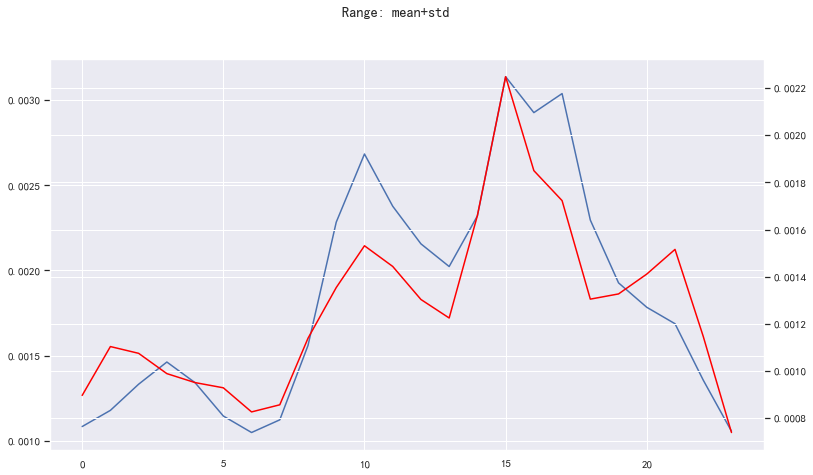

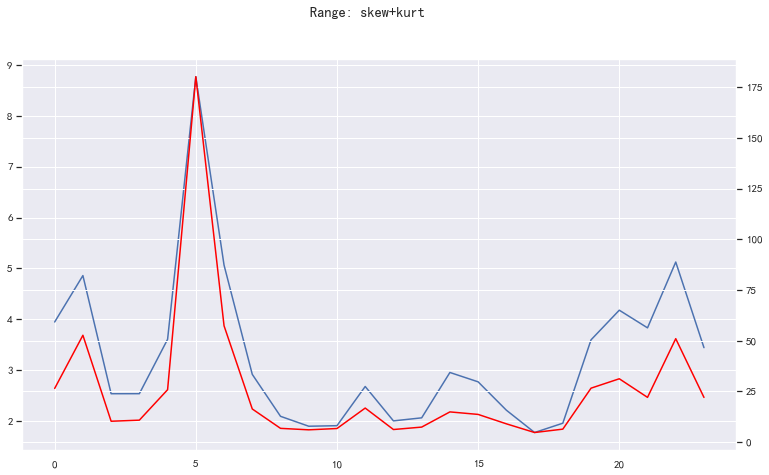

In [11]:
plot_statistic(df_out, affix="Range")


In [12]:
df_out = slice_statistic(affix="Rate")
df_out

,Rate0,Rate1,Rate2,Rate3,Rate4,Rate5,Rate6,Rate7,Rate8,Rate9,Rate10,Rate11,Rate12,Rate13,Rate14,Rate15,Rate16,Rate17,Rate18,Rate19,Rate20,Rate21,Rate22,Rate23
count,2568.0,2574.0,2574.0,2576.0,2575.0,2576.0,2580.0,2580.0,2580.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2584.0,2582.0,2578.0,2574.0,2478.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,-0.000023,0.000029,-0.000014,0.000004,0.000058,0.000039,-0.000001,0.000021,-0.000005,-0.000014,0.000016,-0.000035,-0.000062,-0.000091,-0.000073,0.000019,0.000005,-0.000027,0.000062,0.000047,0.000024,-0.000016,0.000023,-0.000066
var方差,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.0,0.0,0.000001,0.000002,0.000002,0.000002,0.000001,0.000001,0.000002,0.000004,0.000003,0.000003,0.000001,0.000001,0.000001,0.000001,0.000001,0.0
std,0.001128,0.000776,0.000783,0.000844,0.000768,0.000784,0.000584,0.000626,0.00088,0.001241,0.001554,0.001311,0.001135,0.001118,0.001324,0.001896,0.001669,0.001713,0.001209,0.001108,0.001154,0.001104,0.000857,0.000595
sem标准误,0.000022,0.000015,0.000015,0.000017,0.000015,0.000015,0.000011,0.000012,0.000017,0.000024,0.000031,0.000026,0.000022,0.000022,0.000026,0.000037,0.000033,0.000034,0.000024,0.000022,0.000023,0.000022,0.000017,0.000012
mad平均绝对偏差,0.000513,0.000467,0.00052,0.000581,0.000523,0.00044,0.000393,0.00042,0.000605,0.000893,0.001101,0.00094,0.000815,0.000788,0.000889,0.001261,0.00118,0.001221,0.000879,0.000763,0.000728,0.000662,0.000542,0.000398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


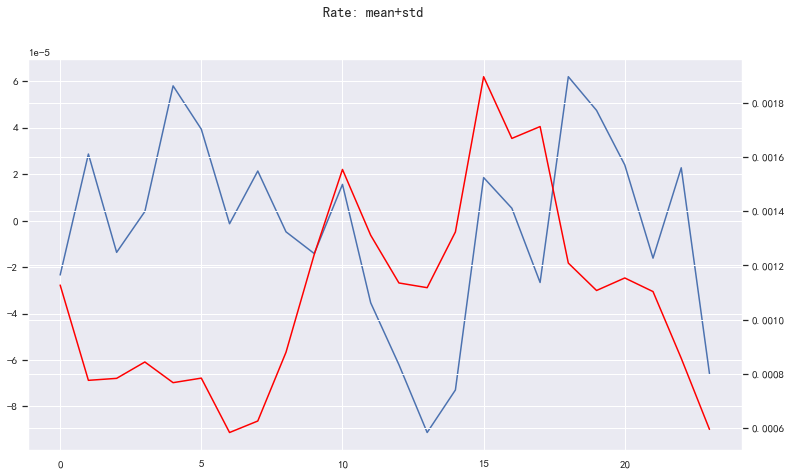

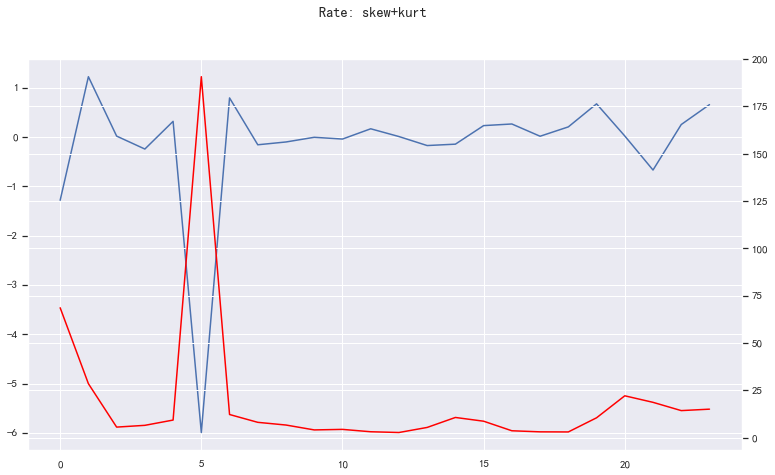

In [13]:
plot_statistic(df_out, affix="Rate")

In [14]:
df_out = slice_statistic(affix="RateInt")
df_out

,RateInt0,RateInt1,RateInt2,RateInt3,RateInt4,RateInt5,RateInt6,RateInt7,RateInt8,RateInt9,RateInt10,RateInt11,RateInt12,RateInt13,RateInt14,RateInt15,RateInt16,RateInt17,RateInt18,RateInt19,RateInt20,RateInt21,RateInt22,RateInt23
count,2568.0,2574.0,2574.0,2576.0,2575.0,2576.0,2580.0,2580.0,2580.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2584.0,2582.0,2578.0,2574.0,2478.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.01324,0.099068,-0.028749,0.017081,0.07534,0.048525,-0.034496,0.035659,0.003488,-0.018533,0.040154,-0.011583,-0.035521,-0.081081,-0.058687,0.024324,-0.002703,-0.018919,0.017761,0.018576,0.018978,-0.015128,0.03108,-0.099274
var方差,0.990086,0.984741,0.990234,0.993883,0.987329,0.991431,0.987953,0.987483,0.995335,0.99618,0.996456,0.995617,0.993717,0.989947,0.994623,0.995546,0.998448,0.995779,0.997753,0.996945,0.99654,0.990458,0.991649,0.976818
std,0.99503,0.992341,0.995105,0.996937,0.993644,0.995706,0.993958,0.993722,0.997665,0.998088,0.998226,0.997806,0.996853,0.994961,0.997308,0.99777,0.999224,0.997887,0.998876,0.998471,0.998269,0.995218,0.995816,0.988341
sem标准误,0.019635,0.019559,0.019614,0.019642,0.019581,0.019618,0.019569,0.019564,0.019642,0.019612,0.019615,0.019606,0.019588,0.01955,0.019597,0.019606,0.019634,0.019608,0.019627,0.019642,0.019646,0.019601,0.019628,0.019854
mad平均绝对偏差,0.989834,0.984935,0.990118,0.993603,0.987501,0.991366,0.987957,0.987515,0.994967,0.995867,0.996164,0.995286,0.993525,0.989878,0.994375,0.995265,0.998067,0.995475,0.997409,0.996616,0.99622,0.99022,0.991506,0.977786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


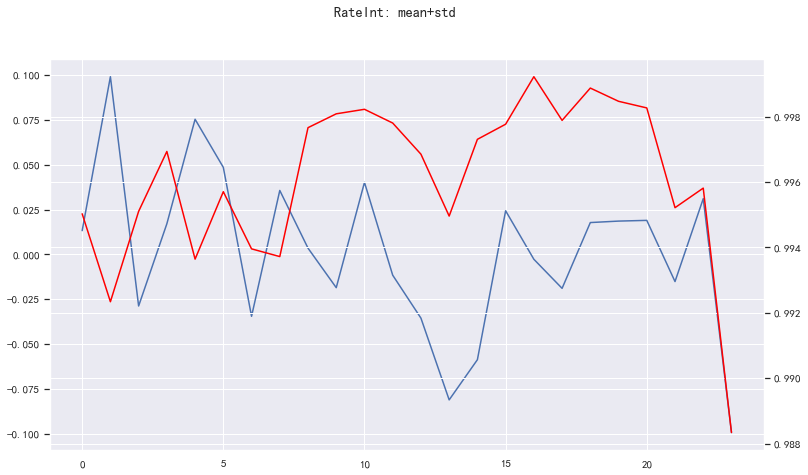

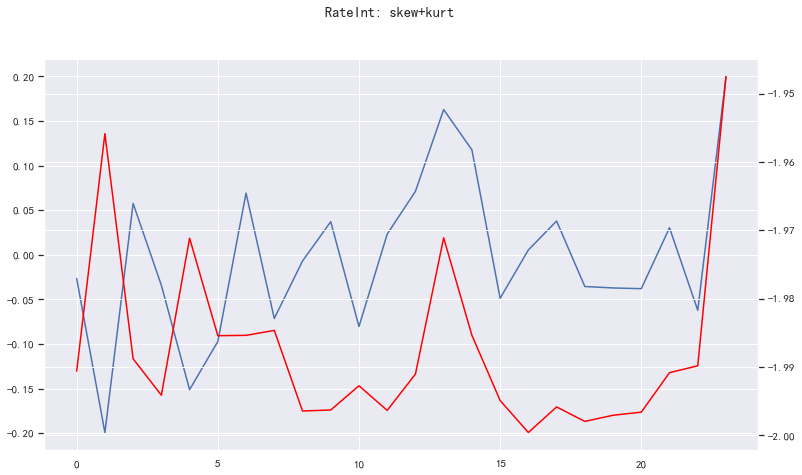

In [15]:
plot_statistic(df_out, affix="RateInt")

In [16]:
df_out = slice_statistic(affix="LogRate")
df_out

,LogRate0,LogRate1,LogRate2,LogRate3,LogRate4,LogRate5,LogRate6,LogRate7,LogRate8,LogRate9,LogRate10,LogRate11,LogRate12,LogRate13,LogRate14,LogRate15,LogRate16,LogRate17,LogRate18,LogRate19,LogRate20,LogRate21,LogRate22,LogRate23
count,2568.0,2574.0,2574.0,2576.0,2575.0,2576.0,2580.0,2580.0,2580.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2584.0,2582.0,2578.0,2574.0,2478.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,-0.000024,0.000028,-0.000014,0.000004,0.000058,0.000039,-0.000001,0.000021,-0.000005,-0.000015,0.000014,-0.000036,-0.000063,-0.000092,-0.000074,0.000017,0.000004,-0.000028,0.000061,0.000047,0.000023,-0.000017,0.000022,-0.000066
var方差,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.0,0.0,0.000001,0.000002,0.000002,0.000002,0.000001,0.000001,0.000002,0.000004,0.000003,0.000003,0.000001,0.000001,0.000001,0.000001,0.000001,0.0
std,0.001128,0.000776,0.000783,0.000844,0.000767,0.000786,0.000583,0.000626,0.00088,0.001241,0.001554,0.001311,0.001135,0.001118,0.001324,0.001896,0.001668,0.001713,0.001209,0.001107,0.001154,0.001104,0.000857,0.000595
sem标准误,0.000022,0.000015,0.000015,0.000017,0.000015,0.000015,0.000011,0.000012,0.000017,0.000024,0.000031,0.000026,0.000022,0.000022,0.000026,0.000037,0.000033,0.000034,0.000024,0.000022,0.000023,0.000022,0.000017,0.000012
mad平均绝对偏差,0.000513,0.000466,0.00052,0.000581,0.000523,0.00044,0.000393,0.00042,0.000605,0.000893,0.001101,0.00094,0.000815,0.000788,0.000889,0.001261,0.00118,0.001221,0.000879,0.000763,0.000728,0.000662,0.000542,0.000398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


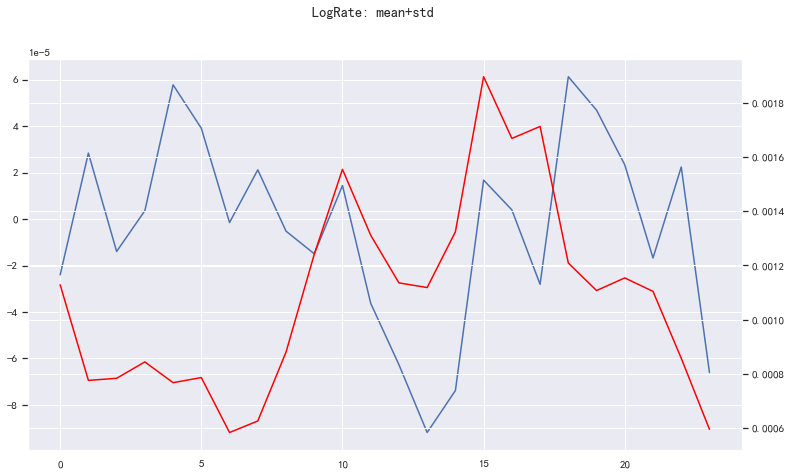

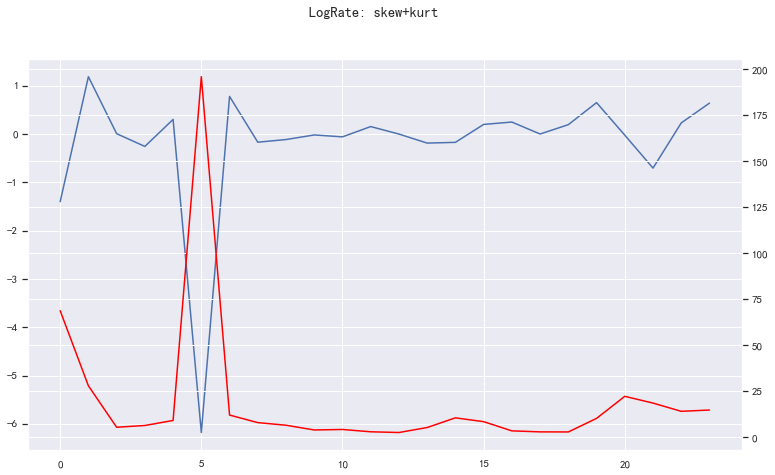

In [17]:
plot_statistic(df_out, affix="LogRate")

In [18]:
df_out = slice_statistic(affix="C-O")
df_out

,C-O0,C-O1,C-O2,C-O3,C-O4,C-O5,C-O6,C-O7,C-O8,C-O9,C-O10,C-O11,C-O12,C-O13,C-O14,C-O15,C-O16,C-O17,C-O18,C-O19,C-O20,C-O21,C-O22,C-O23
count,2569.0,2574.0,2574.0,2576.0,2575.0,2576.0,2580.0,2580.0,2580.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2590.0,2584.0,2582.0,2578.0,2574.0,2478.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.000042,0.000022,-0.000016,0.000003,0.000068,0.000051,-0.000002,0.000026,-0.000004,-0.000016,0.000023,-0.00004,-0.000084,-0.000113,-0.000085,0.00001,0.000004,-0.000039,0.000076,0.000058,0.000028,-0.000027,0.000029,-0.000079
var方差,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000002,0.000004,0.000003,0.000002,0.000002,0.000003,0.000005,0.000004,0.000005,0.000002,0.000002,0.000002,0.000002,0.000001,0.000001
std,0.000809,0.000989,0.001002,0.001055,0.000954,0.000935,0.000733,0.000802,0.001109,0.001533,0.001917,0.00164,0.001436,0.001388,0.001668,0.002321,0.002081,0.002125,0.001502,0.001375,0.001414,0.001357,0.001072,0.000739
sem标准误,0.000016,0.000019,0.00002,0.000021,0.000019,0.000018,0.000014,0.000016,0.000022,0.00003,0.000038,0.000032,0.000028,0.000027,0.000033,0.000046,0.000041,0.000042,0.00003,0.000027,0.000028,0.000027,0.000021,0.000015
mad平均绝对偏差,0.000479,0.000585,0.000652,0.000717,0.000646,0.000539,0.000487,0.000524,0.000752,0.001097,0.001358,0.001163,0.001012,0.000972,0.001105,0.001549,0.001459,0.001505,0.001083,0.000939,0.000893,0.000814,0.000669,0.00049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


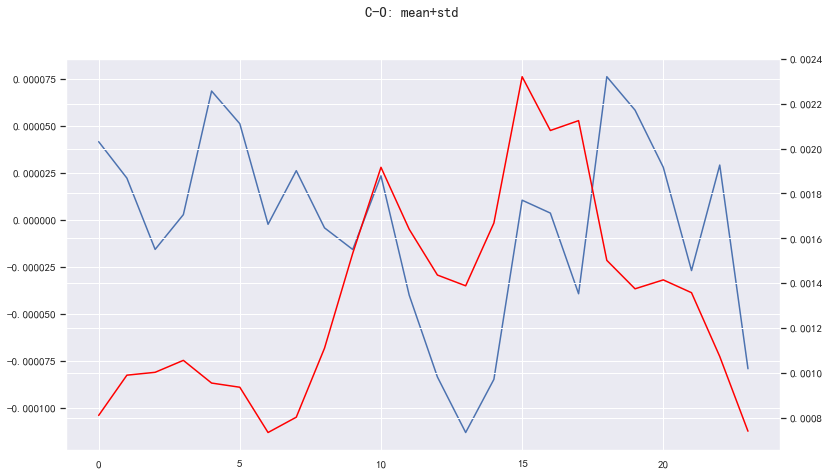

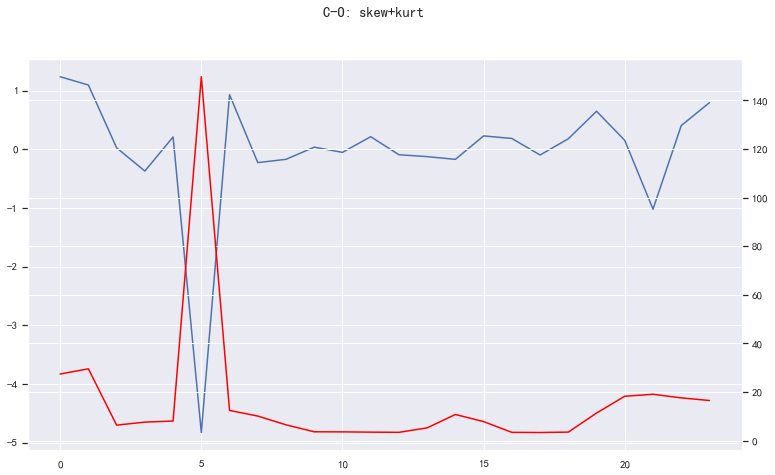

In [19]:
plot_statistic(df_out, affix="C-O")
